#Cleaning the dataset

In [5]:
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

# Dataset: https://www.kaggle.com/amananandrai/clickbait-dataset=clickbait_data.csv

#https://towardsdatascience.com/is-this-headline-clickbait-86d27dc9b389
#https://medium.com/@sid321axn/fake-news-detection-using-nlp-and-machine-learning-in-python-wisdom-ml-6f548b0691a


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics


from wordcloud import WordCloud, STOPWORDS

import string
from string import punctuation
from matplotlib import style

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [6]:
# Loading the data
df = pd.read_csv('/content/sample_data/clickbait_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headline   32000 non-null  object
 1   clickbait  32000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 500.1+ KB


In [7]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)


def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df['headline']=df['headline'].apply(remove_stopwords)

In [8]:
df.head()

,headline,clickbait
0,Get Bings,1
1,TV Female Friend Group Belong,1
2,"New ""Star Wars: Force Awakens"" Trailer Give Ch...",1
3,"Vine New York ""Celebrity Big Brother"" Fucking ...",1
4,Couple Stunning Photo Shoot Baby Learning Inop...,1


In [9]:
# converting to lowercase
df['headline']=df['headline'].str.lower()
df.head()

,headline,clickbait
0,get bings,1
1,tv female friend group belong,1
2,"new ""star wars: force awakens"" trailer give ch...",1
3,"vine new york ""celebrity big brother"" fucking ...",1
4,couple stunning photo shoot baby learning inop...,1


In [10]:
spec_chars = ["-","!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['headline'] = df['headline'].str.replace(char, '')

In [11]:
df.head()

,headline,clickbait
0,get bings,1
1,tv female friend group belong,1
2,new star wars force awakens trailer give chills,1
3,vine new york celebrity big brother fucking pe...,1
4,couple stunning photo shoot baby learning inop...,1


In [12]:
from sklearn.model_selection import train_test_split
X = df['headline']
y = df.clickbait
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=0)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

In [14]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

accuracy:   0.963
Confusion matrix, without normalization


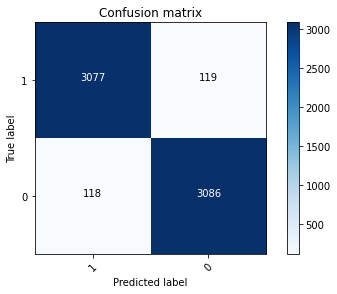

In [25]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[1,0])
plot_confusion_matrix(cm, classes=[1,0])

In [22]:
from sklearn.metrics import classification_report

In [26]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[1,0])
print(cm)
matrix = classification_report(y_test,pred,labels=[1,0])
print('Classification report: \n',matrix)

accuracy:   0.961
[[3069  127]
 [ 124 3080]]
Classification report: 
               precision    recall  f1-score   support

           1       0.96      0.96      0.96      3196
           0       0.96      0.96      0.96      3204

    accuracy                           0.96      6400
   macro avg       0.96      0.96      0.96      6400
weighted avg       0.96      0.96      0.96      6400

